 # <b>1 <span style='color:#F76241'>|</span> Alright, lets build some nifty ML systems!</b>

<font size="9"><b>H</b></font>**old up, not so fast kiddo**. There are some more steps we have to take before getting into predictive modeling. 

Before throwing our data into a black box machine learning algorithm, we need to get to know our data a bit better. Specifically, we need to **understand certain statistics about the dataset** which will **help us when we start using ML**.

As mentioned previously, I will be using the `California housing dataset` to showcase these libraries. Here is an excerpt taken from the <a href="https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html" target="_blank">dataset's scikit-learn webpage</a>:

```
This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

```

Tldr, each record in the dataset is a block of people ranging from 600 to 3,000. It's always important to do a background check on your data.


-----



<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px;">
    <p style="padding: 8px;color:white;text-align: center;">1.1<em> Inspecting the DataFrame</em></p>
</div>

First, we need to import the libraries we'll be using and load in the data.

In [1]:
import pandas as pd                     # data storage and manipulation
import matplotlib.pyplot as plt         # data visualization
import seaborn as sns                   # more data visualization. More options to customize matplotlib plots

The data will be loaded in as a pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html" target="_blank">DataFrame</a>.

`DataFrames` provides us attributes and functions to extract statistics from data. They are similar to spreadsheets in that you have columns and rows. Each column represents some **feature** of your data and the rows are the data points.

<a href="https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/#" target="_blank">There are many ways to instantiate DataFrames.</a> I usually only use two: via python `dictionaries`, and reading a `CSV` file. 

Recall that dictionaries are **key:value** pairs and are in many ways similar to Dataframes actually. When making a DataFrame from a dictionary, each **key** is a column name and **values** are the rows. 

For example:

```python
>>> my_dict = {"Name" : ["Eric", "Steven", "Ryan"], "Age" : [43, 56, 61]}
>>> df = pd.DataFrame(my_dict)
>>> df
```
| Name   | Age |
|--------|-----|
| Eric   | 43  |
| Steven | 56  |
| Ryan   | 61  |

Often when working with data however, you'd want to store in a separate file, such as a **C**omma **S**eparated **V**alues (`CSV`) file and load it in as a DataFrame like so:

In [2]:
df = pd.read_csv("data/housing.csv")

After loading it, now we can use various methods for exploring the information. 

In [3]:
df.head() # gets the five first entries

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail() # gets the last five entries

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


To extract a specific column, there are two ways to doing so: using the square bracket extraction with `[]`, or using the object oriented method:

In [5]:
# these have the same output
print(df["median_house_value"]) 
print("\n")
print(df.median_house_value)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [6]:
df.shape # tells us how large our DataFrame is. In this case, 20640 rows, 10 columns

(20640, 10)

In [7]:
df.describe() # gives us handy statistics such as mean, std, quartiles, etc. for each column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.info() # gives us more detailed information about our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Looking at the return value of `df.info()`, we can see that there are _20640_ entries in total (a.k.a, rows). Most of the data types (Dtype) are floats as well.

Interestingly enough, if you look at **total_bedrooms**, there appears to only be _20433_ non-null entries. This means that 207 records in our DataFrame contain `null` values (20640 - 20433 = 207). These indicate the **absence of a value**. This can happen in many ways: data entry mistake, data not recorded, some computing error, etc. Dealing with missing values in data is very common. There are multiple ways to deal with this which we will get to soon.


Another way of checking for `null` values is the following:

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

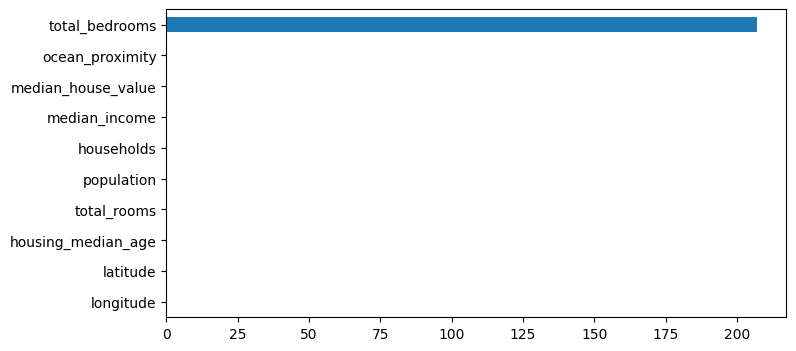

In [10]:
df.isna().sum().sort_values(ascending=True).plot(kind='barh',figsize=(8,4)) # makes a barplot of all missing values.
plt.show()

In order to get a high level overview of the distribution of our data, we should look at <a href="https://www.mathsisfun.com/data/histograms.html" target="_blank">histograms</a> for each numerical attribute. 

Thankfully, the pandas DataFrame class has plotting methods built in that use matplotlib. Additionally, the seaborn library can be used to further customize the matplotlib visuals.

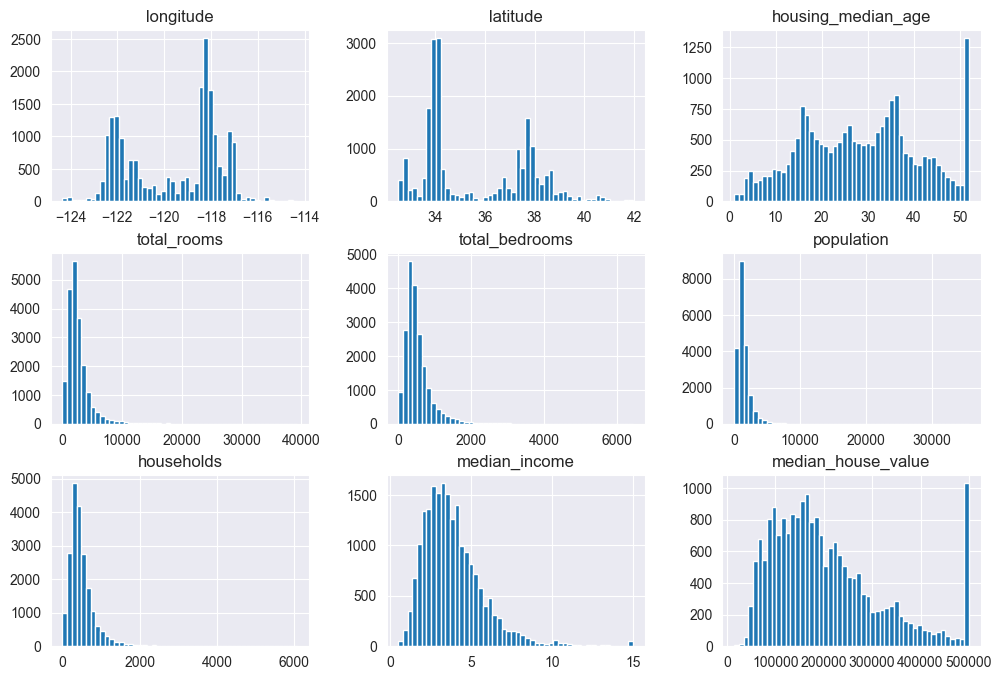

In [11]:
sns.set_style("darkgrid")
df.hist(bins=50, figsize=(12,8))
plt.show()

Eagle-eyed readers may have noticed that some of these plots exhibit odd properties:

1. The **housing_median_age** and **median_house_value** plots have maximum values capped at a point (50 and 500000, respectively).
2. The **median_income** plot x-axis values have been scaled down and also capped. So 5 = 5000, 10 = 10,000, etc up until 15 (15,000).

This is not ideal, as we want our machine learning model to see all possible values, but it's not a huge problem. Another thing to note is that most of these plots are **skewed right**. A.k.a, they extend further to the right of the median than to the left. This behaviour can make it more difficult for machine learning algorithms to detect patterns. Again, this is also not a huge issue though. We will be applying transformations later on that will give it a more normal curve. 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px;">
    <p style="padding: 8px;color:white;text-align: center;">1.2<em> Before we continue...</em></p>
</div>

Before we continue making beautiful visualizations, if you recall from the `01_intro.ipynb` notebook, we need to make **train and test** splits. It's important to do this _before_ inspecting the dataset thoroughly since we need to keep the testing data absolutely separate from the training.

To do this, we will use one of python's core machine learning libraries called <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> to make these splits for us. We will be seeing a lot more of this library in future notebooks. 

In [12]:
from sklearn.model_selection import train_test_split # train, test split creation

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) # creates a 80/20 train/test split

In [13]:
df_train.shape

(16512, 10)

In [14]:
df_test.shape

(4128, 10)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#323232;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px;">
    <p style="padding: 8px;color:white;text-align: center;">1.3<em> More visualizations</em></p>
</div>

Since this data includes latitude and longitude features, let's plot it!

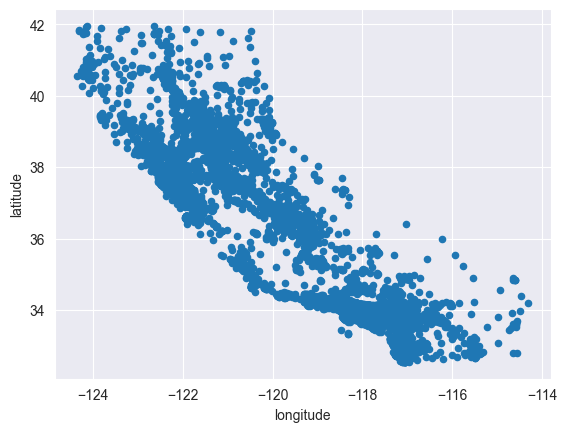

In [15]:
df_train.plot(kind="scatter", x="longitude", y="latitude") 
plt.show()

Aside from resembling California, it's hard to see any pattern here. Many points are overlapping, so lets spice up the visualization to make it easier to analyze:

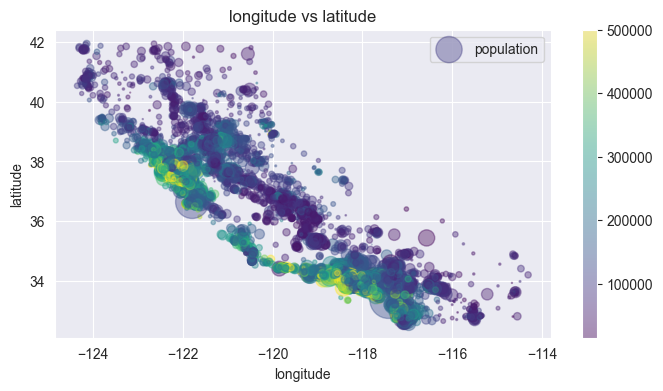

In [16]:
plt.figure(figsize=(8,4))
sc = plt.scatter(x=df_train["longitude"],          # put the longitude column on the x axis
                 y=df_train["latitude"],           # put the latitude column on the y axis
                 alpha=0.4,                        # lets us see overlapping points
                 cmap="viridis",                   # matplotlib coloring scheme
                 c=df_train["median_house_value"], # color points by median_housing_value
                 s=df_train["population"]/50,      # changes point size based off population
                 label='population')

plt.colorbar(sc) # includes a nice looking color bar using the same color scheme as the scatterplot
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend()
plt.show()

Now we can actually see differences in population densities across the state.

Notice how data points closer to the ocean generally have a higher population. Since there's a feature called **ocean_proximity**, lets explore it

In [17]:
ocean_values = df_train["ocean_proximity"].value_counts() # extract the ocean_proximity column and count the occurences of each
print(ocean_values, "\n")

proximity_labels = ocean_values.index # extract the labels for future usage
print(proximity_labels)

ocean_proximity
<1H OCEAN     7341
INLAND        5227
NEAR OCEAN    2086
NEAR BAY      1854
ISLAND           4
Name: count, dtype: int64 

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')


Okay lets plot it on a bar graph.

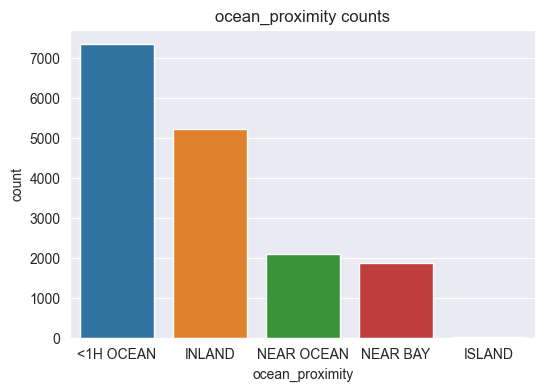

In [18]:
plt.figure(figsize=(6,4))

sns.countplot(data=df_train,                 # provide the dataframe
              x = "ocean_proximity",         # use the "ocean_proximity" column  
              order=proximity_labels)        # enforces a high -> low ordering 
                   
plt.title("ocean_proximity counts")
plt.show()

A pie chart also works well here.

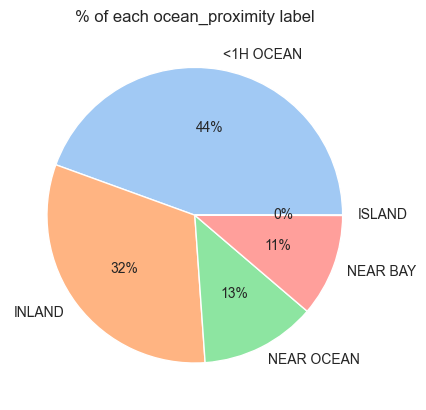

In [19]:
plt.pie(ocean_values, 
        labels = proximity_labels,              # use the ocean_proximity labels
        colors = sns.color_palette('pastel'),   # a better looking color pallete (imo)
        autopct='%.0f%%')                       # adds categorical percents (more info: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct)

plt.title("% of each ocean_proximity label")
plt.show()

From the above two categorical charts, we see that **<1H OCEAN** is the most frequenct label. In fact, we can see that reflected in the scatterplot we made earlier.

Next, we can start looking for <a href="https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-correlation.html" target="_blank"> correlations </a>. To put it simply, correlations tell us how linearly related two features are (a.k.a, when one feature changes, how does the other change?). 

A simple example is the correlation between <a href="https://samples.freshessays.com/correlation-between-ice-cream-sales-and-temperature.html" target="_blank"> ice-cream sales and temperature </a>. As temperature rises, ice-cream sales rise. This is a **positive linear relationship**. On the flip side, as temperature decreases, ice-cream sales decrease. This is a **negative linear relationship**.


An easy way to tell if two features correlate is to plot them on a scatter plot. The following image shows what correlations look like in data:

    
<img src="assets/images/correlation.jpg"  width="500" height="400">
<font size="1"> (image <a href="https://en.wikipedia.org/wiki/Correlation">credits</a>) </font>

The top row shows what the data tends to look like correpsonding to that correlation value. **`Values closer to 1 have positive correlations, while values closer to -1 have negative correlations`**. Values closer to 0 indidate little to no correlation.


Using pandas, we can easily calculate a correlation matrix which compares each feature with every other feature (including itself):

In [20]:
corr_matrix = df_train.corr(numeric_only=True) # this flag tells pandas to ignore non-numeric columns

corr_matrix["median_house_value"].sort_values(ascending=False) # compare "median_house_values" with other features and sort high -> low

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

From this, we can see that **median_income** has a positive correlation with **median_house_value**, as the score is almost .7. 

Pandas has an easier way for visualizing correlations using the `scatter_matrix` function. However, we can't use this to show `all` of the numeric attributes because to can quickly become a lot. For example, 11 numeric attributes would equate to $11^2$ plots, which is 121. Instead, I will only select a few features:

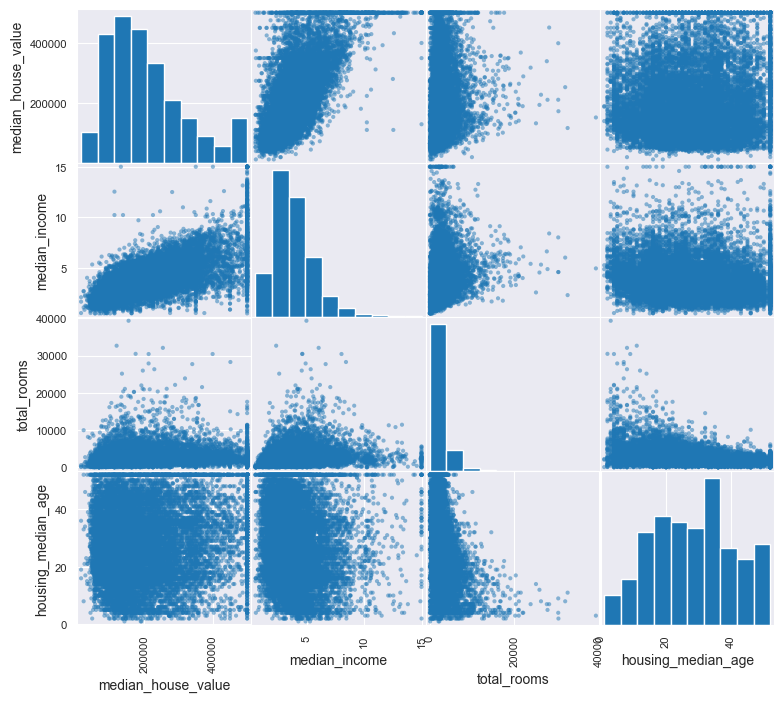

In [21]:
from pandas.plotting import scatter_matrix

features = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(df_train[features], figsize=(9,8))
plt.show()

A couple things to note here:

1. When a feature is plotted against itself, pandas uses a histogram
2. We can see that same positive correlation between **median_house_value** and **median_income**

Let's zoom into the **median_house_value** vs **median_income** plot:

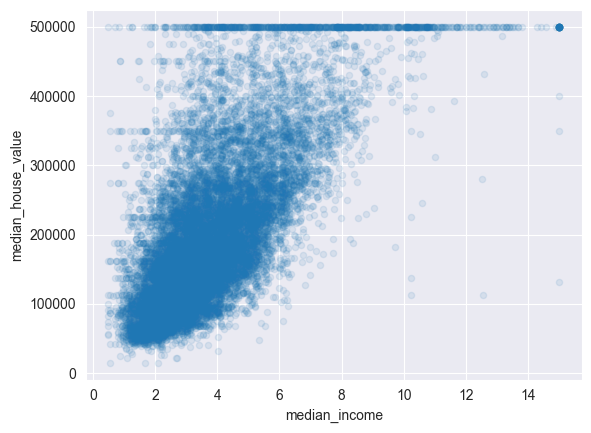

In [22]:
df_train.plot(kind="scatter", 
              x="median_income", 
              y="median_house_value",
              alpha=0.1,
              grid=True)
plt.show()

As we can see from this plot, the correlation is quite noticable. **As median_income increases, median_house_value also increases.**